In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data preprocessing

In [2]:
DATA_DIR = '../data'
BASE_DATASET =  f'{DATA_DIR}/hydropower_efficiency.csv'
SEED = 1

In [3]:
ATTRIBUTES = [
    "altitude_m",
    "nearest_lake_dist_km",
    "days_of_rain",
    "inches_of_rain",
    "avg_high_temp",
    "avg_low_temp"
]

In [4]:
base_df = pd.read_csv(BASE_DATASET)
base_df.drop('plant_id', axis=1, inplace=True)
base_df.drop('type', axis=1, inplace=True)

In [5]:
base_df = base_df[base_df['gwh_per_mm3'] < 10] 

In [6]:
base_df['gwh_per_mm3'].describe()

count    538.000000
mean       1.796218
std        1.969436
min        0.004603
25%        0.450552
50%        0.989524
75%        2.384856
max        9.622222
Name: gwh_per_mm3, dtype: float64

In [7]:
X, y = base_df.drop('gwh_per_mm3', axis=1), base_df['gwh_per_mm3']
X = X[ATTRIBUTES]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

In [8]:
scaler = preprocessing.MinMaxScaler()
X_train[ATTRIBUTES] = scaler.fit_transform(X_train[ATTRIBUTES])
X_val[ATTRIBUTES] = scaler.transform(X_val[ATTRIBUTES])

## Model Training

In [9]:
from sklearn.metrics import r2_score
def train_and_evaluate_model(X_train, y_train, X_val, y_val, algorithm, save_path): #algorithm = constructed algorithm
    model = algorithm.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train, squared = False)
    r2_train = r2_score(y_train, y_pred_train)
    
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val, squared = False)
    r2_val = r2_score(y_val, y_pred_val)
    
    plt.scatter(y_pred_val, y_val, marker = 'o')
    plt.xlabel('Predicted Plant Efficiency (Annual Generation in GWh per mm^3)')
    plt.ylabel('True Plant Efficiency (Annual Generation in GWh per mm^3)')
#     plt.xlim(0, 10)
#     plt.ylim(0, 10)
    plt.savefig('../results/baseline_plots/' + save_path + '.png')
    
    return mse_train, r2_train, mse_val, r2_val 

(1.9151497896190928,
 0.0594609538130203,
 2.0081153615184615,
 -0.010876073312237944)

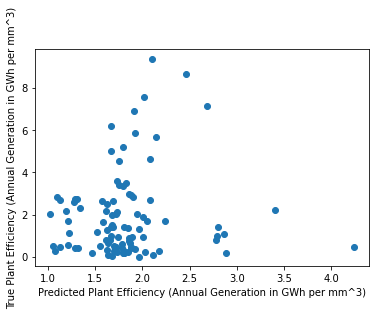

In [10]:
train_and_evaluate_model(X_train, y_train, X_val, y_val, LinearRegression(), 'linear_regression')

(1.97635433274384,
 -0.00161531401602244,
 2.1387102276294545,
 -0.14663314911622338)

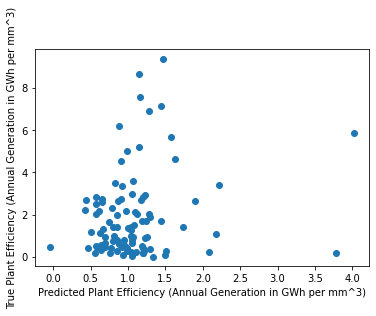

In [11]:
train_and_evaluate_model(X_train, y_train, X_val, y_val, SVR(C=1.0, epsilon=0.2, kernel='poly'), 'svr_polynomial')

(1.9908596998931472,
 -0.016371893210743504,
 2.0750305559756583,
 -0.07936813595454595)

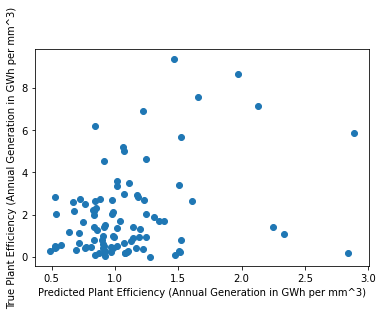

In [12]:
train_and_evaluate_model(X_train, y_train, X_val, y_val, SVR(C=1.0, epsilon=0.2, kernel='rbf'), 'svr_rbf')

## Misc

In [61]:
LR = LinearRegression().fit(X_train, y_train)
y_pred_train = LR.predict(X_train)

In [62]:
mean_squared_error(y_train, y_pred_train, squared=False)

1.9187600107301137

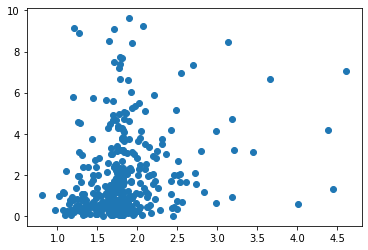

In [63]:
plt.scatter(y_pred_train, y_train, marker='o')

In [70]:
feature_coefficients = [(f, c) for f, c in zip(X_train.columns, LR.coef_)]
feature_coefficients

[('altitude_m', 0.10669728038856127),
 ('nearest_lake_dist_km', 3.1170246459258637),
 ('days_of_rain', -1.2311516772297633),
 ('inches_of_rain', 3.507825821668748),
 ('avg_high_temp', -0.7106327620029694)]

In [310]:
svr = SVR(C=1.0, epsilon=0.2, kernel='poly')
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)

In [311]:
mean_squared_error(y_train, y_pred_train, squared=False)

1.97635433274384

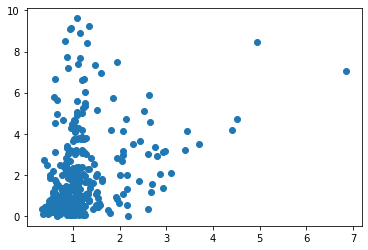

In [312]:
plt.scatter(y_pred_train, y_train, marker='o')

In [313]:
svr = SVR(C=1.0, epsilon=0.2, kernel='rbf')
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)

In [314]:
mean_squared_error(y_train, y_pred_train, squared=False)

1.9908596998931472

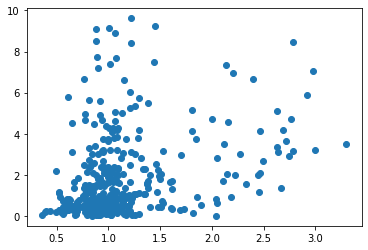

In [315]:
plt.scatter(y_pred_train, y_train, marker='o')